In [2]:
import sys
sys.path.insert(0, '..')
import qtm.qcompilation
import matplotlib.pyplot as plt
import numpy as np
import types, qiskit
import qtm.ansatz, qtm.state
%load_ext autoreload
%autoreload 2

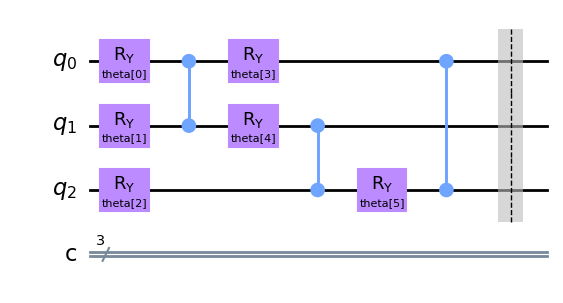

In [6]:
qtm.ansatz.polygongraph_ansatz(3, 1).draw('mpl')

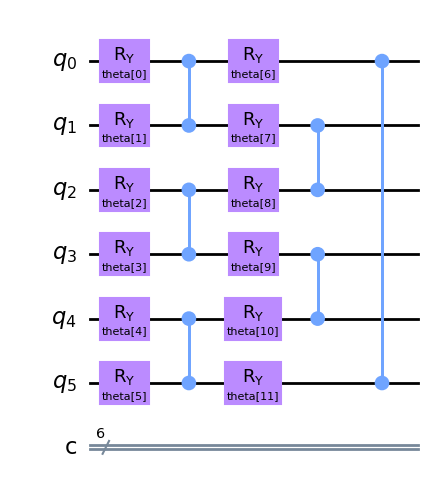

In [7]:
qtm.ansatz.g2(6, 2).draw('mpl')

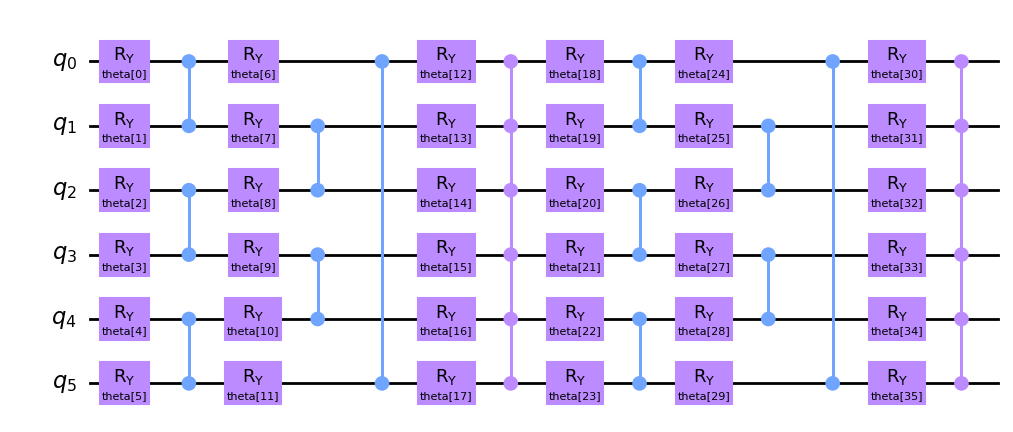

In [8]:
qc = qtm.ansatz.g2gn(6, 2)
qc.draw('mpl')

In [24]:
num_qubits = 3
num_layers = 1
optimizer = 'adam'
compiler = qtm.qcompilation.QuantumCompilation(
    u = qtm.state.create_ghz_state(num_qubits),
    vdagger = qtm.ansatz.Wchain_ZXZlayer_ansatz(num_qubits, num_layers),
    optimizer = optimizer,
    loss_func = 'loss_fubini_study'
)
compiler.fit(num_steps = 100, verbose = 1)

Step: 100%|██████████| 100/100 [00:31<00:00,  3.21it/s]


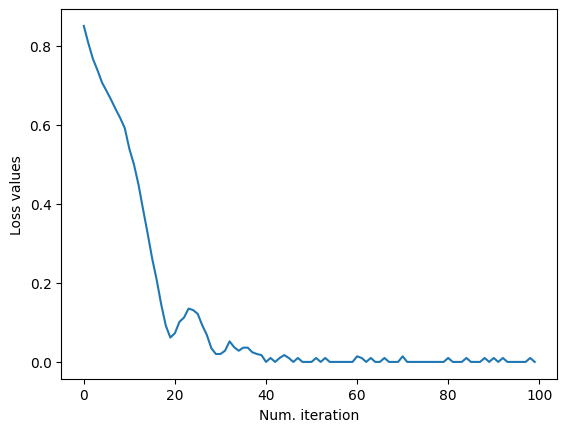

In [30]:
compiler.plot()

MovieWriter ffmpeg unavailable; using Pillow instead.


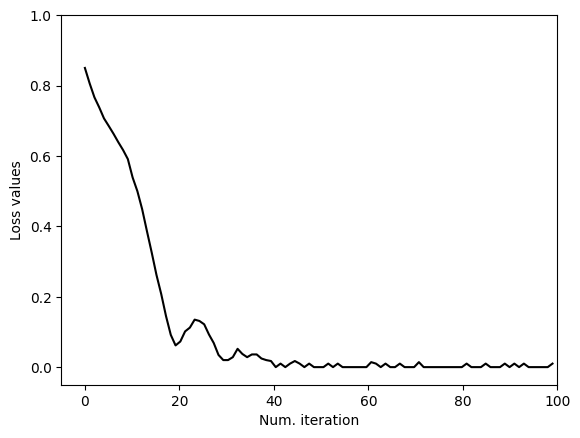

In [33]:
compiler.plot_animation(40, 'test.gif')

In [12]:
num_qubits = 3
num_layers = 2
n_walltoall = qtm.ansatz.calculate_n_walltoall(num_qubits)
thetas = np.ones(num_layers* 3 * num_qubits + num_layers*n_walltoall)

compiler = qtm.qcompilation.QuantumCompilation(
    u = qtm.state.create_haar_state(num_qubits),
    vdagger = qtm.ansatz.create_Walltoall_layerd_ansatz,
    optimizer = 'qng_fubini_study',
    loss_func = 'loss_fubini_study',
    thetas = thetas,
    num_layers = num_layers
)
compiler.fit(num_steps = 10, verbose = 1)


Step:   0%|          | 0/10 [01:45<?, ?it/s]










Step: 100%|██████████| 10/10 [01:49<00:00, 10.93s/it]


In [15]:
import numpy as np
import qiskit
qc = qiskit.QuantumCircuit(5)
vector = 1/(2*np.sqrt(2))*np.asarray([
    1, 0, 0, 1, 0, 0, 0, 0,
    0, 0, 0, 0, 1, 0, 0, -1,
    0, 0, 0, 0, 0, -1, 1, 0,
    0, 1, 1, 0, 0, 0, 0, 0,    
])
qc.initialize(vector)
transipled_qc = qiskit.compiler.transpile(qc, basis_gates=['u1', 'u2', 'u3', 'cx'], optimization_level=3)
transipled_qc.draw(output='mpl')

psi = qiskit.quantum_info.Statevector(qc)
print(np.around(psi, 2))

[ 0.35+0.j -0.  +0.j -0.  +0.j  0.35+0.j -0.  -0.j  0.  +0.j  0.  +0.j
 -0.  +0.j  0.  -0.j  0.  -0.j  0.  -0.j -0.  +0.j  0.35+0.j  0.  -0.j
 -0.  -0.j -0.35+0.j  0.  +0.j -0.  +0.j  0.  -0.j  0.  +0.j -0.  -0.j
 -0.35+0.j  0.35+0.j  0.  +0.j -0.  +0.j  0.35+0.j  0.35+0.j -0.  +0.j
  0.  -0.j -0.  -0.j  0.  +0.j  0.  +0.j]


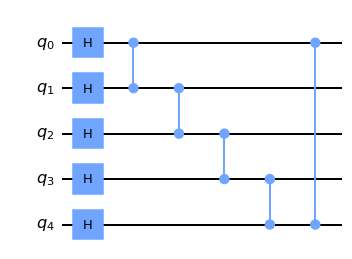

In [12]:
import qtm.ansatz
qc1 = qiskit.QuantumCircuit(5)
for i in range(0, 5):
    qc1.h(i)
for i in range(0, 5):
    if i == 4:
        qc1.cz(i, 0)
    else: 
        qc1.cz(i, i + 1)
qc1.draw('mpl')


In [14]:
print(qiskit.quantum_info.Statevector(qc1))

Statevector([ 0.1767767+0.j,  0.1767767+0.j,  0.1767767+0.j,
             -0.1767767+0.j,  0.1767767+0.j,  0.1767767+0.j,
             -0.1767767+0.j,  0.1767767+0.j,  0.1767767+0.j,
              0.1767767+0.j,  0.1767767+0.j, -0.1767767+0.j,
             -0.1767767+0.j, -0.1767767+0.j,  0.1767767+0.j,
             -0.1767767+0.j,  0.1767767+0.j, -0.1767767+0.j,
              0.1767767+0.j,  0.1767767+0.j,  0.1767767+0.j,
             -0.1767767+0.j, -0.1767767+0.j, -0.1767767+0.j,
             -0.1767767+0.j,  0.1767767+0.j, -0.1767767+0.j,
             -0.1767767+0.j,  0.1767767+0.j, -0.1767767+0.j,
             -0.1767767+0.j, -0.1767767+0.j],
            dims=(2, 2, 2, 2, 2))
